In [1]:
# Step 1: Install required libraries
!pip install textblob
!pip install wordcloud
!pip install nltk
!pip install gensim


In [7]:
# Step 2: Import necessary libraries
from google.colab import drive
import nltk
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
from gensim import corpora
from gensim.models.ldamodel import LdaModel

nltk.download('punkt')
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer

# # Step 3: Mount Google Drive to access the .txt file
# drive.mount('/content/drive')



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [8]:
# Step 4: Load the .txt file
file_path = '/content/scopus.txt'  # Change this to your file path

with open(file_path, 'r') as file:
    text = file.read()



TextBlob Sentiment: Sentiment(polarity=0.07289471983974835, subjectivity=0.44009444950397497)
VADER Sentiment: {'neg': 0.022, 'neu': 0.832, 'pos': 0.146, 'compound': 1.0}


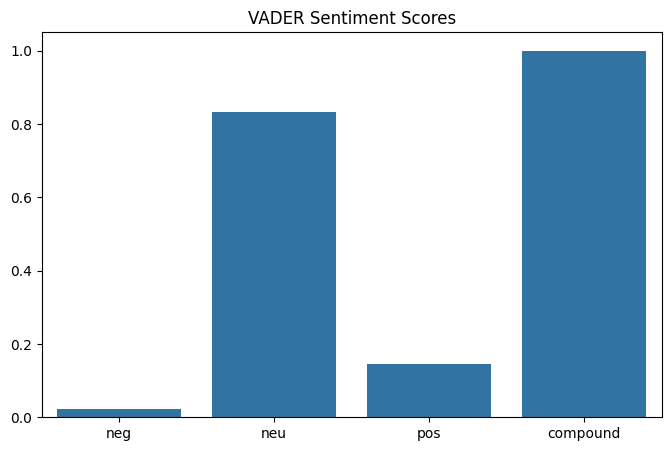

In [9]:
# Step 5: Sentiment Analysis using TextBlob and VADER
def perform_sentiment_analysis(text):
    # TextBlob Sentiment
    blob = TextBlob(text)
    textblob_sentiment = blob.sentiment
    print(f"TextBlob Sentiment: {textblob_sentiment}")

    # VADER Sentiment
    sia = SentimentIntensityAnalyzer()
    vader_sentiment = sia.polarity_scores(text)
    print(f"VADER Sentiment: {vader_sentiment}")

    # Plot VADER sentiment scores
    plt.figure(figsize=(8, 5))
    sns.barplot(x=list(vader_sentiment.keys()), y=list(vader_sentiment.values()))
    plt.title("VADER Sentiment Scores")
    plt.show()

perform_sentiment_analysis(text)

LDA Topics:

Topic 0: 0.002*"," + 0.002*";" + 0.001*"and" + 0.001*"of" + 0.001*":"
Topic 1: 0.001*"," + 0.001*";" + 0.001*"and" + 0.001*"." + 0.001*":"
Topic 2: 0.072*"," + 0.046*";" + 0.030*":" + 0.030*"of" + 0.029*"the"
Topic 3: 0.012*";" + 0.011*"," + 0.007*":" + 0.006*"and" + 0.005*"of"
Topic 4: 0.003*"," + 0.002*";" + 0.002*"and" + 0.001*":" + 0.001*"the"


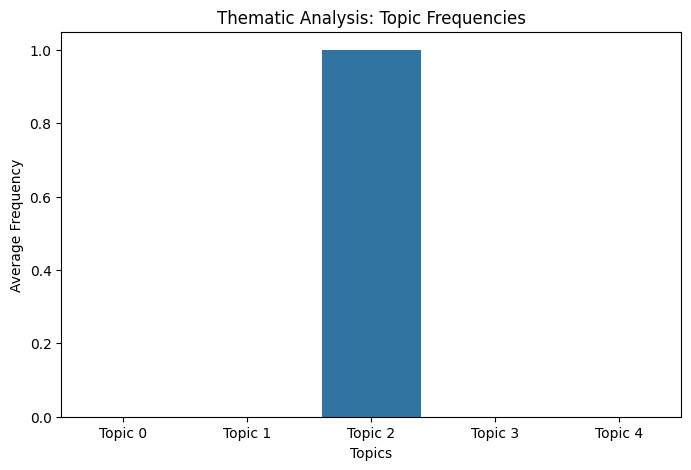

In [11]:
# Step 6: Thematic Analysis using LDA (Topic Modeling)
def perform_thematic_analysis(text):
    # Tokenize the text into words
    words = [nltk.word_tokenize(text.lower())]

    # Create a dictionary and corpus for topic modeling
    dictionary = corpora.Dictionary(words)
    corpus = [dictionary.doc2bow(word_list) for word_list in words]

    # Build LDA Model
    lda_model = LdaModel(corpus=corpus, num_topics=5, id2word=dictionary, passes=10)

    # Print the topics
    topics = lda_model.print_topics(num_words=5)
    print(f"LDA Topics:\n")
    for topic in topics:
        print(f"Topic {topic[0]}: {topic[1]}")

    # Get topic distribution across all documents
    topic_distribution = [lda_model.get_document_topics(doc) for doc in corpus]

    # Aggregate the topic frequencies across all documents
    topic_frequencies = [0] * lda_model.num_topics
    for doc in topic_distribution:
        for topic_num, freq in doc:
            topic_frequencies[topic_num] += freq

    # Normalize topic frequencies by the number of documents
    topic_frequencies = [freq / len(corpus) for freq in topic_frequencies]

    # Plot the topic frequencies
    plt.figure(figsize=(8, 5))
    sns.barplot(x=[f'Topic {i}' for i in range(lda_model.num_topics)], y=topic_frequencies)
    plt.title("Thematic Analysis: Topic Frequencies")
    plt.ylabel("Average Frequency")
    plt.xlabel("Topics")
    plt.show()

perform_thematic_analysis(text)


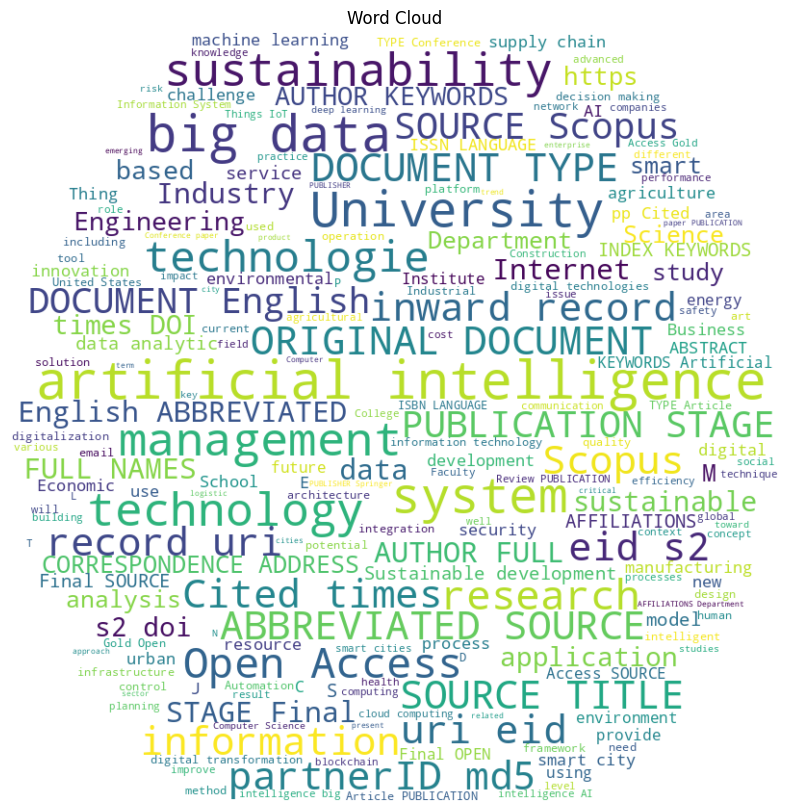

In [17]:
# Step 7: Generate a wider and shorter elliptical Word Cloud
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def generate_word_cloud(text):
    # Create a wider and shorter elliptical mask using numpy
    x, y = np.ogrid[:800, :800]
    mask = ((x - 400)**2 / 2.5 + (y - 400)**2 / 1.8) > 300**2  # Adjust the numbers to make it wider and shorter
    mask = 255 * mask.astype(int)  # Convert mask to correct format for wordcloud

    # Generate word cloud with a mask and center the frequent words
    wordcloud = WordCloud(
        width=800,
        height=800,
        background_color='white',
        prefer_horizontal=1,  # Prefer horizontal orientation for central words
        mask=mask,  # Apply the elliptical mask
        contour_color='white',  # Add a border around the shape
        contour_width=1.5
    ).generate(text)

    # Display the word cloud using matplotlib
    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title("Word Cloud")
    plt.show()

generate_word_cloud(text)
